In [1]:
from matplotlib import pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os
from astropy.modeling.blackbody import blackbody_lambda
from astropy import units as u
plt.rcParams.update({'font.size': 18})

In [2]:
# Import the function definitions that accompany this notebook tutorial.
nb_funcdef_file = "function_defs.py"
if os.path.isfile(nb_funcdef_file):
    from function_defs import make_lightcurve, listdir_contains
else:
    raise IOError("Could not find function definition file '" + nb_funcdef_file + "' that goes with this notebook.")

In [3]:
# Restore the output directory.  Note: this assumes you've run the "generate_products" notebook already.  If not you
# will need to specify the location of the products made from the "generate_products" notebook.
%store -r data_directory
# If you have not run the "generate_products" notebook during this session, uncomment the line below and specify
# the location of the output products.
#data_directory = "./raw_files/"

In [4]:
# Restore the skypos parameter.  Note: this assumes you've run the "generate_products" notebook already.  If not you
# will need to specify the sky position to use.
%store -r skypos
# If you have not run the "generate_products" notebook during this session, uncomment the line below and specify
# the sky position in degrees.
#skypos = (24.76279, -17.94948)

In [5]:
# Locate the photon files.
photon_files = {'NUV':listdir_contains(data_directory,'nd.csv'),
                'FUV':listdir_contains(data_directory,'fd.csv')}

In [6]:
# Since this flare has such a large count rate, we can make a 5-second light curve to explore it's shape in detail.
# Flare #8 is in Visit #5 (index 4 in our array of .csv files.)
lc_nuv = make_lightcurve(photon_files['NUV'][4], 'NUV', stepsz=5., skypos=skypos, quiet=True, makefile=False)
lc_fuv = make_lightcurve(photon_files['FUV'][4], 'FUV', stepsz=5., skypos=skypos, fixed_t0=lc_nuv['t0'].min(),
                             quiet=True, makefile=False)

Max. cps for FUV = 158.7857090114415
Max. cps for NUV = 838.5825824857579


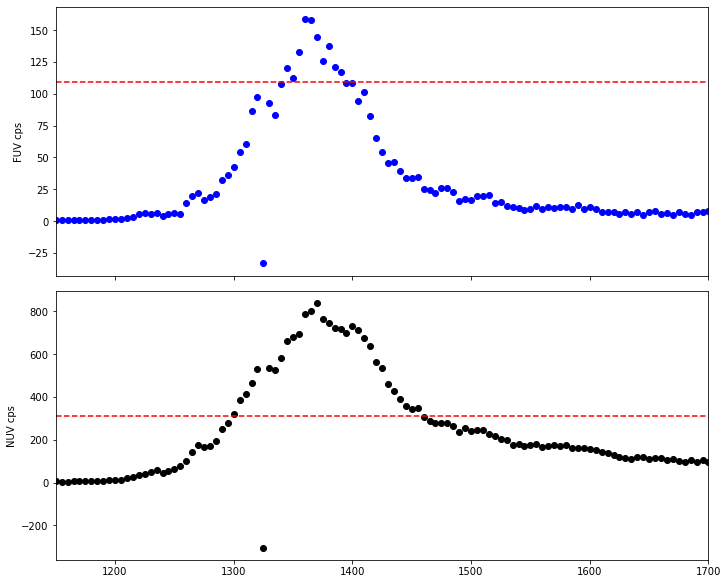

In [7]:
# The flare can get quite bright.  Let's check the counts per second to make sure none of them
# exceed the non-linearity regime of the GALEX detectors.
# We want to avoid any count rates above the 10% local non-linearity dropoff of the detectors.  These values
# are taken from the Morrissey et al. 2007 GALEX calibration paper.
nuv_10p_nonlincps = 311.
fuv_10p_nonlincps = 109.
print("Max. cps for FUV = " + str(max(lc_fuv['cps'])))
print("Max. cps for NUV = " + str(max(lc_nuv['cps'])))
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), constrained_layout=True, sharex=True)
ax1.plot(lc_fuv['t0']-lc_fuv['t0'][0], lc_fuv['cps'], 'bo')
ax2.plot(lc_nuv['t0']-lc_nuv['t0'][0], lc_nuv['cps'], 'ko')
ax1.axhline(fuv_10p_nonlincps, color='r', linestyle='--')
ax2.axhline(nuv_10p_nonlincps, color='r', linestyle='--')
ax1.set_xlim(1150., 1700.)
ax2.set_xlim(1150., 1700.)
ax1.set_ylabel("FUV cps")
ax2.set_ylabel("NUV cps")
plt.show()

Unfortuantely, the majoriy of the flare in both bands exceeds the local non-linearity regime for the GALEX detectors. This means there is an expected flux suppression: following the VERY approximate estimation formula in the Morrissey et al. 2007 GALEX calibration paper, the suppression would be 30% and 25% at peak count rates in the NUV and FUV, respectively.  But that estimate has a large (and uncharacterized) uncertainty around it: even the white dwarf standards used to derive the empirical correction show huge scatter for a given expected count rate.  For example, see the range in measured count rate for the multiple data points at an expected count rate of 800 cps in Fig. 8 in Morrissey et al. 2007: those imply actual corrections between 0% and a factor of four.  Given that there is no well-tested way to correct for lost flux due to local non-linearity in the GALEX detectors, an FUV-NUV band ratio analysis during the flare is not possible.  See the paper associated with this repository for a further discussion on the matter.